In [1]:
import pandas as pd
import numpy as np


In [2]:
df_patient = pd.read_csv('data_creation/100_ECG.csv')
df_patient = df_patient.iloc[:, 0]
df_patient

0        -0.145
1        -0.145
2        -0.145
3        -0.145
4        -0.145
          ...  
649995   -0.075
649996   -0.445
649997   -0.675
649998   -0.765
649999   -1.280
Name: MLII, Length: 650000, dtype: float64

In [3]:
import wfdb.processing
rpeaks = wfdb.processing.xqrs_detect(df_patient, fs=360, verbose=False)

In [4]:
import wfdb.processing

# Assuming 'ecg_signal' is your ECG signal and 'rpeaks' are the initially detected R-peaks
rpeaks_corrected = wfdb.processing.correct_peaks(
    df_patient, rpeaks, search_radius=1, smooth_window_size=50, peak_dir="up"
)


In [5]:
import pandas as pd
import numpy as np

# Assuming 'df_patient' is your ECG signal DataFrame and 'rpeaks_corrected' contains the corrected R-peaks

sampling_rate = 360  # Sampling rate of the ECG signal
samples_before_after = int(0.6 * sampling_rate)  # Samples before and after the peak

# Initialize an empty list to store the segments
segments = []

for peak in rpeaks:
    start = max(peak - samples_before_after, 0)
    end = min(peak + samples_before_after + 1, len(df_patient))
    segment = df_patient[start:end].values.flatten()
    
    # Padding if necessary (if the segment is at the beginning or end of the signal)
    if len(segment) < (2 * samples_before_after + 1):
        segment = np.pad(segment, (0, 2 * samples_before_after + 1 - len(segment)), 'constant', constant_values=(0,))
    
    segments.append(segment)

# Convert the list of segments into a DataFrame
df_patient = pd.DataFrame(segments)

df_patient


,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,432
0,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.145,-0.120,-0.135,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,-0.350,-0.350,-0.345,-0.335,-0.335,-0.335,-0.350,-0.355,-0.355,-0.345,...,-0.340,-0.330,-0.340,-0.340,-0.340,-0.330,-0.335,-0.330,-0.335,-0.345
2,-0.395,-0.405,-0.415,-0.420,-0.420,-0.410,-0.415,-0.425,-0.420,-0.435,...,-0.345,-0.340,-0.310,-0.305,-0.305,-0.310,-0.305,-0.290,-0.285,-0.275
3,-0.410,-0.425,-0.410,-0.405,-0.395,-0.400,-0.400,-0.405,-0.385,-0.400,...,-0.290,-0.290,-0.300,-0.305,-0.285,-0.280,-0.275,-0.280,-0.275,-0.270
4,-0.375,-0.380,-0.390,-0.380,-0.375,-0.375,-0.375,-0.375,-0.380,-0.390,...,-0.305,-0.275,-0.270,-0.255,-0.260,-0.265,-0.260,-0.250,-0.235,-0.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,-0.385,-0.400,-0.395,-0.385,-0.370,-0.375,-0.385,-0.390,-0.365,-0.365,...,-0.150,-0.180,-0.215,-0.245,-0.250,-0.270,-0.280,-0.295,-0.310,-0.330
2269,-0.350,-0.345,-0.345,-0.335,-0.350,-0.350,-0.355,-0.340,-0.345,-0.335,...,-0.185,-0.240,-0.265,-0.275,-0.285,-0.295,-0.310,-0.335,-0.355,-0.360
2270,-0.385,-0.380,-0.370,-0.390,-0.385,-0.390,-0.385,-0.370,-0.375,-0.375,...,-0.305,-0.300,-0.315,-0.305,-0.310,-0.335,-0.355,-0.385,-0.395,-0.400
2271,-0.370,-0.375,-0.380,-0.370,-0.355,-0.365,-0.370,-0.375,-0.385,-0.370,...,-0.355,-0.335,-0.325,-0.335,-0.370,-0.420,-0.450,-0.435,-0.425,-0.450


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_patient = scaler.fit_transform(df_patient)
df_patient = pd.DataFrame(df_patient)


In [7]:
# import pywt

# def madev(d, axis=None):
#     'Mean absolute deviation of a signal'
#     return np.mean(np.absolute(d - np.mean(d, axis)), axis)

# def wavelet_denoising(x, wavelet='sym4', level=1):
#     coeff = pywt.wavedec(x, wavelet, mode="per")
#     sigma = (1/0.6745) * madev(coeff[-level])
#     uthresh = sigma * np.sqrt(2 * np.log(len(x)))
#     coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
#     return pywt.waverec(coeff, wavelet, mode='per')


# df_patient = wavelet_denoising(df_patient, wavelet='sym4', level=2)
# df_patient = pd.DataFrame(df_patient)

# df_patient = df_patient.drop(columns=[df_patient.columns[0], df_patient.columns[-1]])


In [8]:
df_patient

,0,1,2,3,4,5,6,7,8,9,...,423,424,425,426,427,428,429,430,431,432
0,0.260504,0.263305,0.263610,0.260163,0.274788,0.324324,0.329932,0.335740,0.322368,0.277937,...,0.368078,0.362805,0.368421,0.453125,0.415282,0.400000,0.378378,0.341954,0.360231,0.338192
1,0.145658,0.148459,0.148997,0.157182,0.167139,0.195946,0.190476,0.184116,0.167763,0.157593,...,0.146580,0.161585,0.144737,0.187500,0.189369,0.200000,0.177177,0.152299,0.167147,0.137026
2,0.120448,0.117647,0.108883,0.111111,0.118980,0.145270,0.146259,0.133574,0.125000,0.106017,...,0.143322,0.155488,0.164474,0.214844,0.212625,0.212121,0.195195,0.175287,0.195965,0.177843
3,0.112045,0.106443,0.111748,0.119241,0.133144,0.152027,0.156463,0.148014,0.148026,0.126074,...,0.179153,0.185976,0.171053,0.214844,0.225914,0.230303,0.213213,0.181034,0.201729,0.180758
4,0.131653,0.131653,0.123209,0.132791,0.144476,0.168919,0.173469,0.169675,0.151316,0.131805,...,0.169381,0.195122,0.190789,0.253906,0.242525,0.239394,0.222222,0.198276,0.224784,0.201166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,0.126050,0.120448,0.120344,0.130081,0.147309,0.168919,0.166667,0.158845,0.161184,0.146132,...,0.270358,0.253049,0.226974,0.261719,0.249169,0.236364,0.210210,0.172414,0.181556,0.145773
2269,0.145658,0.151261,0.148997,0.157182,0.158640,0.185811,0.187075,0.194946,0.174342,0.163324,...,0.247557,0.216463,0.194079,0.238281,0.225914,0.221212,0.192192,0.149425,0.155620,0.128280
2270,0.126050,0.131653,0.134670,0.127371,0.138810,0.158784,0.166667,0.173285,0.154605,0.140401,...,0.169381,0.179878,0.161184,0.214844,0.209302,0.196970,0.165165,0.120690,0.132565,0.104956
2271,0.134454,0.134454,0.128940,0.138211,0.155807,0.175676,0.176871,0.169675,0.148026,0.143266,...,0.136808,0.158537,0.154605,0.191406,0.169435,0.145455,0.108108,0.091954,0.115274,0.075802


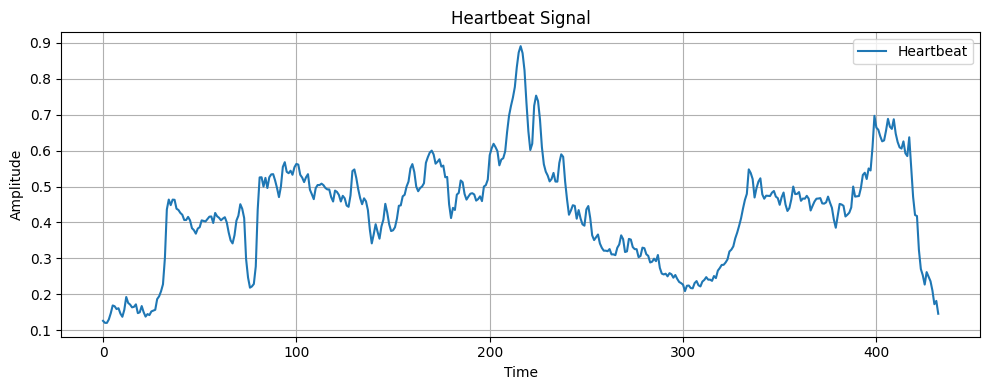

In [10]:
import matplotlib.pyplot as plt
import numpy as np

heartbeat_values = df_patient.iloc[2268,]
heartbeat_values
# Creating a time axis for the 3600 points, assuming each point represents a unit of time
time_axis = np.arange(0, 432)

# Plotting the heartbeat
plt.figure(figsize=(10, 4))
plt.plot(time_axis, heartbeat_values, label='Heartbeat')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Heartbeat Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

with open('svm_classifier.pkl', 'rb') as file:
    svm_classifier = pickle.load(file)

print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
# Use the model to make predictions
prediction = svm_classifier.predict(df_patient)

prediction = pd.DataFrame(prediction)
number = prediction.value_counts()
number

/Users/arthurdesmazures/venv-metal/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0
1    2273
Name: count, dtype: int64